In [53]:
import numpy as np
import pandas as pd

import os
os.getcwd()

'C:\\Users\\Tim\\Documents\\machine_learning_class\\Contest1\\scikit_learn'

In [99]:
dataframe = pd.read_csv('../test.csv')
dataset = dataframe.values
x_val = dataset.astype(float)

dataframe = pd.read_csv('../train.csv', delimiter=',')
dataset = dataframe.values
y = dataset[:,0]
x = dataset[:,1:len(dataframe.columns)].astype(float)

In [119]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

def encode(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    return y, encoder
    
y, y_encoder = encode(y)
print(y.shape)
print(y_encoder.classes_)
y.view()

(178,)
['cold' 'dusk' 'flowers' 'impressions' 'oval' 'scene' 'trees' 'water']


array([4, 2, 0, 5, 7, 3, 3, 3, 0, 3, 6, 1, 7, 6, 6, 7, 7, 2, 5, 1, 4, 1,
       2, 7, 2, 6, 2, 2, 7, 0, 0, 6, 6, 1, 2, 6, 5, 5, 0, 1, 1, 2, 0, 5,
       5, 3, 7, 7, 2, 0, 7, 1, 7, 7, 1, 2, 3, 3, 3, 7, 5, 5, 1, 7, 3, 5,
       2, 5, 0, 7, 5, 1, 1, 5, 7, 0, 5, 5, 3, 3, 0, 0, 6, 3, 5, 2, 1, 1,
       2, 0, 4, 7, 0, 4, 0, 7, 5, 5, 1, 6, 1, 2, 7, 1, 3, 3, 0, 0, 1, 2,
       6, 2, 1, 7, 0, 0, 5, 2, 0, 1, 1, 7, 1, 1, 0, 4, 0, 1, 0, 5, 7, 6,
       1, 2, 5, 5, 1, 6, 6, 1, 7, 7, 6, 7, 5, 3, 7, 2, 1, 7, 5, 3, 5, 5,
       6, 6, 0, 5, 7, 1, 7, 1, 2, 7, 6, 7, 5, 7, 7, 5, 7, 3, 2, 2, 7, 1,
       7, 6], dtype=int64)

In [111]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [105]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [114]:
gbm0 = GradientBoostingClassifier(random_state=10)
#modelfit(gbm0, x, y_fit, y_cv)

In [115]:
gbm0.fit(x, y_fit)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [121]:
v_score = cross_validation.cross_val_score(gbm0, x, y_fit, cv=5, scoring='accuracy')

In [123]:
print(v_score, np.mean(v_score))

[0.57894737 0.36842105 0.44444444 0.24242424 0.45454545] 0.41775651249335455


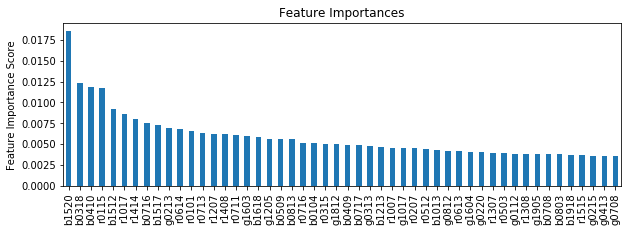

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
feat_imp = pd.Series(gbm0.feature_importances_, dataframe.columns[1:1701]).sort_values(ascending=False)[0:50]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [146]:
def gbm_search(para_grid, folds=5, n_repeats=5):
    grid_search = GridSearchCV(
        estimator=GradientBoostingClassifier(subsample=0.8, random_state=10),
        param_grid=param_grid, 
        scoring='accuracy',
        n_jobs=-1, 
        cv=folds)
    return grid_search

param_grid = {'max_depth':[5, 7, 9, 11, 13, 15, 20, 25, 30]}
gmb_grid = gbm_search(param_grid)

gmb_grid.fit(x, y)
gmb_grid.grid_scores_, gmb_grid.best_params_, gmb_grid.best_score_

([mean: 0.41573, std: 0.09141, params: {'max_depth': 5},
  mean: 0.41573, std: 0.10581, params: {'max_depth': 7},
  mean: 0.42697, std: 0.06194, params: {'max_depth': 9},
  mean: 0.42135, std: 0.05826, params: {'max_depth': 11},
  mean: 0.42135, std: 0.07617, params: {'max_depth': 13},
  mean: 0.46629, std: 0.06344, params: {'max_depth': 15},
  mean: 0.41573, std: 0.07692, params: {'max_depth': 20},
  mean: 0.39326, std: 0.07285, params: {'max_depth': 25},
  mean: 0.39888, std: 0.07146, params: {'max_depth': 30}],
 {'max_depth': 15},
 0.46629213483146065)

In [142]:
param_grid = {'max_depth':[13, 14, 15, 16, 17, 18, 19, 20]}
gbm_grid = gbm_search(param_grid)

gbm_grid.fit(x, y)
gbm_grid.grid_scores_, gmb_grid.best_params_, gmb_grid.best_score_

([mean: 0.42135, std: 0.07617, params: {'max_depth': 13},
  mean: 0.44944, std: 0.05782, params: {'max_depth': 14},
  mean: 0.46629, std: 0.06344, params: {'max_depth': 15},
  mean: 0.42697, std: 0.07544, params: {'max_depth': 16},
  mean: 0.41573, std: 0.06658, params: {'max_depth': 17},
  mean: 0.43820, std: 0.05414, params: {'max_depth': 18},
  mean: 0.38202, std: 0.04308, params: {'max_depth': 19},
  mean: 0.41573, std: 0.07692, params: {'max_depth': 20}],
 {'max_depth': 15},
 0.46629213483146065)

In [154]:
param_grid = {'max_depth':[15], 'n_estimators':[60], 'max_features':['sqrt']}
gbm_grid = gbm_search(param_grid)

gbm_grid.fit(x, y)
gbm_grid.grid_scores_, gmb_grid.best_params_, gmb_grid.best_score_

([mean: 0.46629, std: 0.06344, params: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 60},
  mean: 0.42697, std: 0.05153, params: {'max_depth': 15, 'max_features': 'log2', 'n_estimators': 60}],
 {'max_depth': 15, 'n_estimators': 60},
 0.46629213483146065)

`gbm` is not senstive to `n_estimators`, `min_samples_split`, `min_samples_leaf`

In [158]:
param_grid = {'max_depth':[15], 'n_estimators':[60], 'max_features':['sqrt']}
gbm_grid = gbm_search(param_grid)

gbm_grid.fit(x, y)
gbm_grid.grid_scores_, gmb_grid.best_params_, gmb_grid.best_score_

([mean: 0.46629, std: 0.06344, params: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 60}],
 {'max_depth': 15, 'n_estimators': 60},
 0.46629213483146065)

In [160]:
gbm = GradientBoostingClassifier(max_depth=15, n_estimators=60)
gbm.fit(x, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [163]:
x_c = x - np.mean(x)

In [165]:
param_grid = {'max_depth':[2, 3, 4, 5, 7, 9, 11, 13, 15]}
gmb_grid = gbm_search(param_grid)

gmb_grid.fit(x_c, y)
gmb_grid.grid_scores_, gmb_grid.best_params_, gmb_grid.best_score_

([mean: 0.38764, std: 0.06605, params: {'max_depth': 2},
  mean: 0.43258, std: 0.08250, params: {'max_depth': 3},
  mean: 0.42697, std: 0.07947, params: {'max_depth': 4},
  mean: 0.45506, std: 0.05371, params: {'max_depth': 5},
  mean: 0.41573, std: 0.08900, params: {'max_depth': 7},
  mean: 0.41011, std: 0.06040, params: {'max_depth': 9},
  mean: 0.42135, std: 0.07856, params: {'max_depth': 11},
  mean: 0.41573, std: 0.05711, params: {'max_depth': 13},
  mean: 0.42135, std: 0.05507, params: {'max_depth': 15},
  mean: 0.43258, std: 0.08951, params: {'max_depth': 20},
  mean: 0.41011, std: 0.06516, params: {'max_depth': 25},
  mean: 0.40449, std: 0.06216, params: {'max_depth': 30}],
 {'max_depth': 5},
 0.4550561797752809)

In [169]:
x_s = x_c/np.std(x)

In [170]:
param_grid = {'max_depth':[2, 3, 4, 5, 7, 9, 11, 13, 15]}
gmb_grid = gbm_search(param_grid)

gmb_grid.fit(x_s, y)
gmb_grid.grid_scores_, gmb_grid.best_params_, gmb_grid.best_score_

([mean: 0.40449, std: 0.06176, params: {'max_depth': 2},
  mean: 0.43820, std: 0.08562, params: {'max_depth': 3},
  mean: 0.43820, std: 0.07753, params: {'max_depth': 4},
  mean: 0.43820, std: 0.07299, params: {'max_depth': 5},
  mean: 0.39326, std: 0.07890, params: {'max_depth': 7},
  mean: 0.43258, std: 0.04993, params: {'max_depth': 9},
  mean: 0.41573, std: 0.10444, params: {'max_depth': 11},
  mean: 0.39888, std: 0.07487, params: {'max_depth': 13},
  mean: 0.42135, std: 0.07455, params: {'max_depth': 15}],
 {'max_depth': 3},
 0.43820224719101125)

In [171]:
x_val_c = x_val - np.mean(x_val)
x_val_s = x_val_c/np.std(x_val)

In [162]:
test_outcomes = gbm.predict(x_val_c)
id_data = np.r_[1:64]
class_data = y_encoder.inverse_transform(test_outcomes)
test_df = pd.DataFrame(data={'id': id_data, 'class': class_data}, columns=['id', 'class'])
test_df.to_csv('gbm_sub_c.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
